In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("bollywood1to950.csv")

In [4]:
df.head(5)

,Name,Year,Rating,Runtime,Votes
0,Skater Girl,2021,6.6,107.0,1122.0
1,Radhe,2021,1.8,135.0,162353.0
2,Soorarai Pottru,2020,9.1,153.0,82987.0
3,Sandeep Aur Pinky Faraar,2021,6.3,125.0,6480.0
4,The White Tiger,2021,7.1,125.0,49865.0


In [5]:
df.drop('Year',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     950 non-null    object 
 1   Rating   577 non-null    float64
 2   Runtime  630 non-null    float64
 3   Votes    577 non-null    float64
dtypes: float64(3), object(1)
memory usage: 29.8+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 948
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     542 non-null    object 
 1   Rating   542 non-null    float64
 2   Runtime  542 non-null    float64
 3   Votes    542 non-null    float64
dtypes: float64(3), object(1)
memory usage: 21.2+ KB


In [9]:
df.describe()

,Rating,Runtime,Votes
count,542.000000,542.000000,542.000000
mean,6.157749,117.439114,4819.313653
std,1.660391,24.915068,12772.636659
min,1.100000,45.000000,5.000000
25%,5.100000,101.000000,82.000000
50%,6.400000,119.000000,653.500000
75%,7.400000,134.750000,4035.000000
max,9.700000,261.000000,162353.000000


Rating


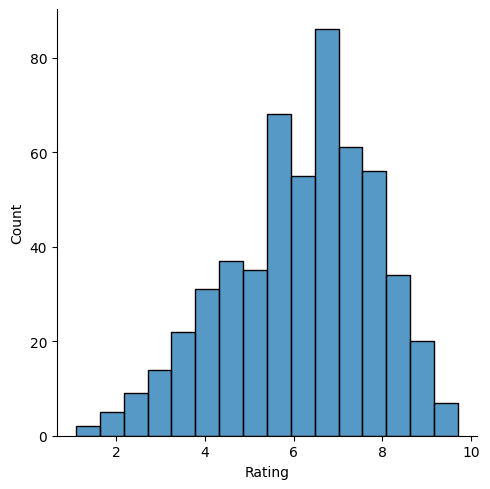

Runtime


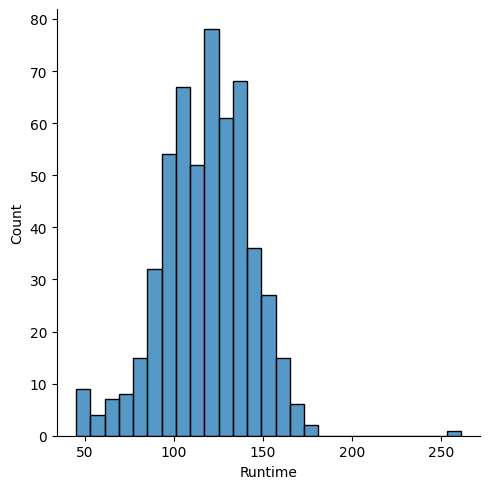

Votes


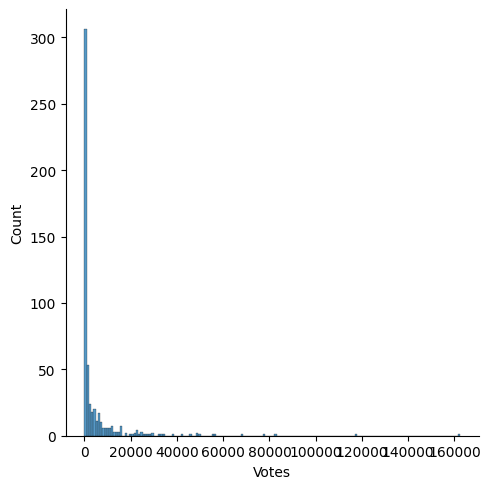

In [10]:
for col_name in df.select_dtypes('number').columns:
    print(col_name)
    sns.displot(df[col_name])
    plt.show()

Rating


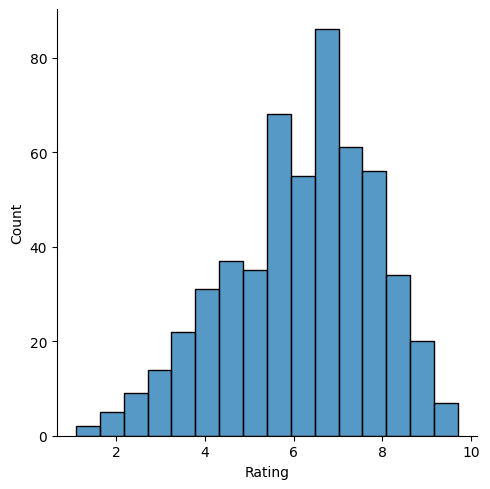

Runtime


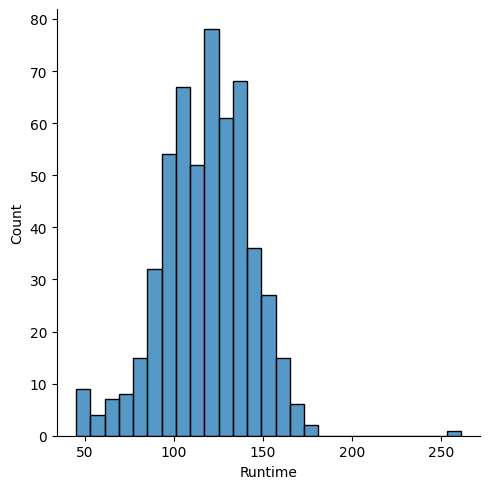

Votes


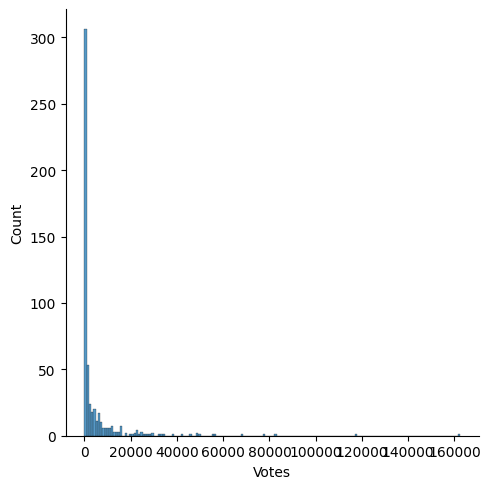

In [11]:
for col_name in df.select_dtypes('number').columns:
    print(col_name)
    sns.displot(df[col_name])
    plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [13]:
feature=mm.fit_transform(df.drop('Name',axis=1))

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
similarity=cosine_similarity(feature)

In [16]:
cosine_df=pd.DataFrame(similarity,index=df['Name'],columns=df['Name'])

In [18]:
def recommend_movies (movie_name):
    print('Movie Watched:',movie_name)
    print('Top 10 Recommended Movies:')
    for i in cosine_df[movie_name].sort_values(ascending=False)[1:].head(10).index:
        print(i)

In [19]:
recommend_movies('GOLD')

Movie Watched: GOLD
Top 10 Recommended Movies:
Malang
Batla House
Shakuntala Devi
Angrezi Medium
Kesari
Vada Chennai
Raat Akeli Hai
Pati Patni Aur Woh
Mulk
Thappad
